<a href="https://colab.research.google.com/github/LeticiaHeeren/DIO-transfer-learning/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define a URL do dataset
url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

# Baixar e descompactar o dataset
dataset = tf.keras.utils.get_file('flower_photos.tgz', url, untar=True, cache_dir='.')

# Defina o caminho do diretório
dataset_dir = dataset.rsplit('/', 1)[0]

# Carregar as imagens com a função image_dataset_from_directory
image_size = (180, 180)  # Redimensionar todas as imagens
batch_size = 32

train_dataset = image_dataset_from_directory(
    dataset_dir + '/flower_photos',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

validation_dataset = image_dataset_from_directory(
    dataset_dir + '/flower_photos',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
# Normalização das imagens (valor de cada pixel entre 0 e 1)
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Aplicando a normalização no dataset
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(180, 180, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False  # Congelar as camadas do modelo pré-treinado

# Adicionar camadas de treinamento customizadas
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 classes de flores
])


<ipython-input-9-77811c8fe3eb>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(180, 180, 3),


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=10)  # Número de épocas ajustável

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 244ms/step - accuracy: 0.6844 - loss: 0.9213 - val_accuracy: 0.8433 - val_loss: 0.4656
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.8793 - loss: 0.3184 - val_accuracy: 0.8665 - val_loss: 0.3770
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.9210 - loss: 0.2215 - val_accuracy: 0.8719 - val_loss: 0.3778
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.9624 - loss: 0.1357 - val_accuracy: 0.8787 - val_loss: 0.3548
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9734 - loss: 0.0977 - val_accuracy: 0.8747 - val_loss: 0.3814
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9805 - loss: 0.0718 - val_accuracy: 0.8869 - val_loss: 0.3974
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9887 - loss: 0.0518 - val_accuracy: 0.8842 - val_loss: 0.3962
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.9942 - loss: 0.0297 - val_accuracy: 0.892

In [ ]:
# ... (código anterior) ...

# Certifique-se de que model.compile() é chamado antes de model.evaluate()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

test_loss, test_acc = model.evaluate(validation_dataset)
print(f"Accuracy on the validation dataset: {test_acc * 100:.2f}%")

# ... (restante do código) ...

23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.1433 - loss: 2.0317
Accuracy on the validation dataset: 14.44%


In [ ]:
test_loss, test_acc = model.evaluate(validation_dataset)
print(f"Accuracy on the validation dataset: {test_acc * 100:.2f}%")

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.1428 - loss: 2.0166
Accuracy on the validation dataset: 14.44%


In [ ]:
base_model.trainable = True
# Congelar as camadas do modelo pré-treinado a partir da camada específica
fine_tune_at = 100  # Número de camadas a descongelar

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Continuar o treinamento
history_fine = model.fit(train_dataset,
                         validation_data=validation_dataset,
                         epochs=10)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 209ms/step - accuracy: 0.6282 - loss: 0.9470 - val_accuracy: 0.8093 - val_loss: 0.6191
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9462 - loss: 0.1894 - val_accuracy: 0.8501 - val_loss: 0.4865
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9807 - loss: 0.0733 - val_accuracy: 0.8624 - val_loss: 0.4433
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9914 - loss: 0.0339 - val_accuracy: 0.8692 - val_loss: 0.4215
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.9991 - loss: 0.0175 - val_accuracy: 0.8978 - val_loss: 0.3722
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.9959 - loss: 0.0152 - val_accuracy: 0.8978 - val_loss: 0.3505
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.9958 - loss: 0.0152 - val_accuracy: 0.8856 - val_loss: 0.3717
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9986 - loss: 0.0108 - val_accuracy: 0.8924 

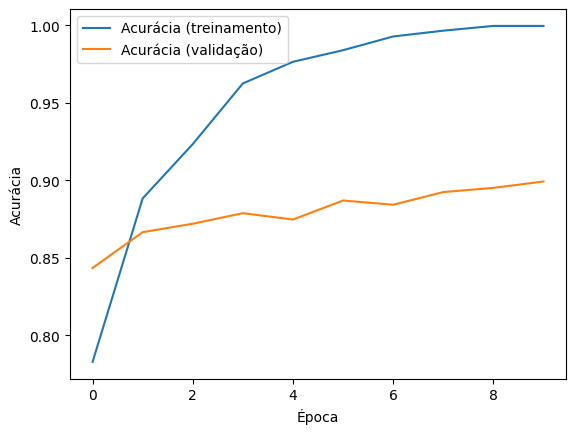

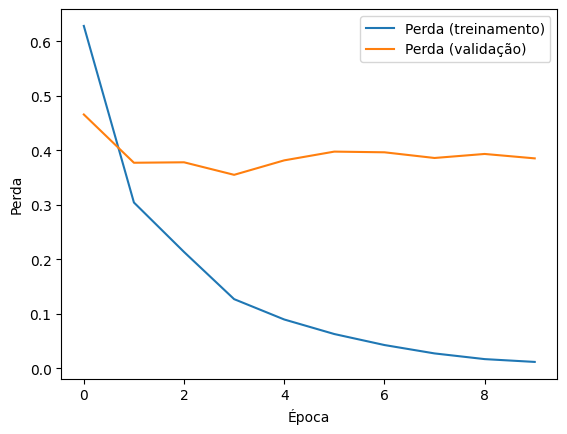

In [ ]:
import matplotlib.pyplot as plt

# Visualizando as métricas de treinamento
plt.plot(history.history['accuracy'], label='Acurácia (treinamento)')
plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Visualizando a perda de treinamento
plt.plot(history.history['loss'], label='Perda (treinamento)')
plt.plot(history.history['val_loss'], label='Perda (validação)')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()
